In [4]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [5]:
datos = datasets.load_iris()

In [11]:
X = datos.data

In [10]:
Y = datos.target

In [2]:
def oneHot(y, numElem, numClases) :
    resp = np.zeros([numElem, numClases])
    for i in np.arange(numClases):
        resp[:,i] = (y==i)*1
    return resp

In [12]:
Yoh = oneHot(Y, Y.shape[0], Y.max()+1)
Yoh

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
#Caracteristicas en X
numX = 4
#Numero de neuronas en las capa oculta (H)
numH = 3
#Numero de neuronas de salida
numS = 1

In [13]:
class Capa():
    def __init__(self, numEntradas, numSalidas):
        self.pesos = np.random.uniform(low=-0.5, high=0.5, size=[numEntradas, numSalidas])

In [7]:
np.random.seed(0)
Wh = np.random.uniform(low=-0.2, high=0.2, size=(numX, numH))

Ws = np.random.uniform(low=-0.2, high=0.2, size=(numH, numS))



In [14]:
class MLP():
    def __init__(self, capa1, capa2):
        self.capa1 = capa1
        self.capa2 = capa2

In [15]:
#Crear capas MLP
c1 = Capa(4,16)
c2 = Capa(16,3)

In [18]:
red = MLP(c1, c2)
red.capa1

In [8]:
Wh

array([[ 0.0195254 ,  0.08607575,  0.04110535],
       [ 0.01795327, -0.03053808,  0.05835765],
       [-0.02496512,  0.1567092 ,  0.1854651 ],
       [-0.04662339,  0.11669002,  0.01155797]])

In [9]:
Ws

array([[ 0.02721782],
       [ 0.17023866],
       [-0.17158558]])

In [10]:
def sigmoide (x):
    return 1/(1+np.exp(-x))

In [11]:
#Derivada de la función sigmoide.
def derSigmoide (x):
    return x*(1 - x)

In [41]:
np.random.seed(0)
errores = np.array([])
n = 0.3
debug = False
#haran i iteraciones para ajustar los pesos
for i in np.arange(0,20000):
    #indice de algun elemento para entrenamiento
    index = np.random.randint(low=0, high=100, size=1)
    if (debug):
        print(index)
    
    #elemento Xi
    xx = X[index]
    if(debug):
        print(xx.shape)
        print(xx)
    #Calculo de Yh -> salidas en la capa oculta
    vh = xx.dot(Wh)
    if(debug):
        print(yh)
    
    yh = sigmoide(vh)
    if(debug):    
        print(ys) 
        print("vh = {}\nyh = {}".format(vh, yh))
    #vh = xx.dot(W)
    
    vs = yh.dot(Ws)
    if(debug):
        print(vs)
    
    ys = sigmoide(vs)
    #Calculo del error
    errorS = Y[index] - ys
    errores = np.append(errores, errorS)
    if(debug):
        print("error=",errorS)
    
    #derivadas de yh, ys
    dYh = derSigmoide(yh)
    dYs = derSigmoide(ys)
    if(debug):
        print("dYh = ", dYh)
        print("dYs = ", dYs)
    
    #delta en cada capa de salida
    deltaS = errorS * dYs
    
    errorH = deltaS.dot(Ws.T)
    deltaH = errorH * dYh
    if(debug):
        print("dYh {} \ndTs {}".format(dYh, dYs))
        print("dim deltaS {} deltaS = {}".format(deltaS.shape, deltaS))
        print("dim ErrorH {} ErrorH = {}".format(errorH.shape, errorH))
    ajusteH = xx.T.dot(deltaH)
    ajusteS = yh.T.dot(deltaS)
    
    if(debug):
        print("delta {}".format(deltaH))
        print("ajusteH = xx.T {} deltaH {} \n {} \n".format(xx.T.shape, deltaH.shape, ajusteH))
        print("ajusteS = yh.T.shape {} deltaS {} \n {} \n".format(yh.T.shape, deltaS.shape, ajusteS))
    
    Wh += n*ajusteH
    Ws += n*ajusteS
    
    n = n*.999
    
    

In [32]:
errores

array([-0.45728369, -0.44782744,  0.56888785,  0.55303917,  0.53670228,
       -0.48020737,  0.53420656, -0.4827396 , -0.47146904,  0.54221877])

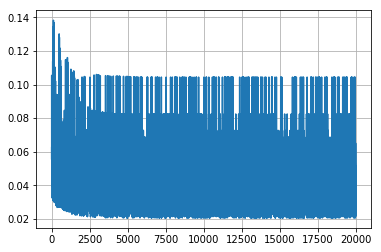

In [42]:
plt.plot(np.arange(0,len(errores)),np.abs(errores))
plt.grid()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

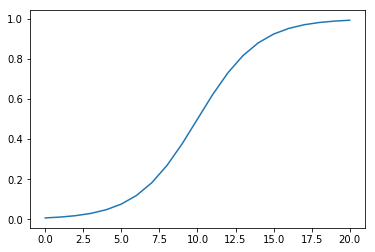

In [14]:
tmp = np.linspace(-5, 5, 21)
tmpX = np.arange(0,21)
plt.plot(tmpX, sigmoide(tmp))

In [48]:
def predict(x):
    yh = sigmoide(x.dot(Wh))
    ys = sigmoide(yh.dot(Ws))
    return ys

In [58]:
#(predict(X)>=0.5)*1

In [56]:
#Se realiza la clasificación a partir de los datos de entrada.
#Se genera una matriz de las clases que etiquetó el clasificador a cada entrada.
respt = (predict(X)>=0.5)*1
respt = respt.reshape(100)

In [57]:
#Se compara las etiquetas del target y las etiquetas del clasificador para comparar
#qué elementos se clasificaron de forma correcta
(respt==Y)*1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])